# Legacy Photometry

* John Moustakas provided tables for the first 20 galaxies in the catalog.
* The tables are now on github in Virgo/tables directory
* This notebook shows how to read in the tables and plot SED

In [7]:
from astropy.io import fits
from astropy.table import Table
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import warnings
import os

In [8]:

homedir = os.getenv('HOME')
tabledir = homedir+'/github/Virgo/tables/'

In [9]:
ptab = Table.read(tabledir+'virgofilaments-phot.fits')

In [10]:
ptab

RELEASE,BRICKID,BRICKNAME,OBJID,BRICK_PRIMARY,MASKBITS,FITBITS,TYPE,RA,DEC,RA_IVAR,DEC_IVAR,BX,BY,DCHISQ [5],EBV,MJD_MIN,MJD_MAX,REF_CAT,REF_ID,PMRA,PMDEC,PARALLAX,PMRA_IVAR,PMDEC_IVAR,PARALLAX_IVAR,REF_EPOCH,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_G_N_OBS,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_N_OBS,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_N_OBS,GAIA_PHOT_VARIABLE_FLAG,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_ASTROMETRIC_EXCESS_NOISE_SIG,GAIA_ASTROMETRIC_N_OBS_AL,GAIA_ASTROMETRIC_N_GOOD_OBS_AL,GAIA_ASTROMETRIC_WEIGHT_AL,GAIA_DUPLICATED_SOURCE,GAIA_A_G_VAL,GAIA_E_BP_MIN_RP_VAL,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_NUV,FLUX_FUV,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,FLUX_IVAR_NUV,FLUX_IVAR_FUV,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,APFLUX_G [8],APFLUX_R [8],APFLUX_Z [8],APFLUX_RESID_G [8],APFLUX_RESID_R [8],APFLUX_RESID_Z [8],APFLUX_BLOBRESID_G [8],APFLUX_BLOBRESID_R [8],APFLUX_BLOBRESID_Z [8],APFLUX_IVAR_G [8],APFLUX_IVAR_R [8],APFLUX_IVAR_Z [8],APFLUX_MASKED_G [8],APFLUX_MASKED_R [8],APFLUX_MASKED_Z [8],APFLUX_W1 [5],APFLUX_W2 [5],APFLUX_W3 [5],APFLUX_W4 [5],APFLUX_RESID_W1 [5],APFLUX_RESID_W2 [5],APFLUX_RESID_W3 [5],APFLUX_RESID_W4 [5],APFLUX_IVAR_W1 [5],APFLUX_IVAR_W2 [5],APFLUX_IVAR_W3 [5],APFLUX_IVAR_W4 [5],APFLUX_NUV [5],APFLUX_FUV [5],APFLUX_RESID_NUV [5],APFLUX_RESID_FUV [5],APFLUX_IVAR_NUV [5],APFLUX_IVAR_FUV [5],MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,NOBS_G,NOBS_R,NOBS_Z,NOBS_W1,NOBS_W2,NOBS_W3,NOBS_W4,RCHISQ_G,RCHISQ_R,RCHISQ_Z,RCHISQ_W1,RCHISQ_W2,RCHISQ_W3,RCHISQ_W4,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACFLUX_W1,FRACFLUX_W2,FRACFLUX_W3,FRACFLUX_W4,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,ANYMASK_G,ANYMASK_R,ANYMASK_Z,ALLMASK_G,ALLMASK_R,ALLMASK_Z,WISEMASK_W1,WISEMASK_W2,PSFSIZE_G,PSFSIZE_R,PSFSIZE_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,NEA_G,NEA_R,NEA_Z,BLOB_NEA_G,BLOB_NEA_R,BLOB_NEA_Z,PSFDEPTH_W1,PSFDEPTH_W2,PSFDEPTH_W3,PSFDEPTH_W4,WISE_COADD_ID,WISE_X,WISE_Y,SERSIC,SERSIC_IVAR,SHAPE_R,SHAPE_R_IVAR,SHAPE_E1,SHAPE_E1_IVAR,SHAPE_E2,SHAPE_E2_IVAR
int16,int32,bytes19,int32,bool,int16,int16,bytes3,float64,float64,float32,float32,float32,float32,float32,float32,float64,float64,bytes2,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,int16,float32,float32,int16,bool,float32,float32,int16,int16,float32,bool,float32,float32,float32,float32,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,int16,int16,int16,uint8,uint8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes8,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
9009,-1,custom-110333p74323,44,True,4096,1536,REX,110.33359888204767,74.32327991456702,185541700000.0,146862080000.0,247.70467,241.86754,35591.08 .. 0.0,0.02598529,57904.21054205407,58499.01681488874,L3,1387024,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Plot SED

In [33]:
def getSED(table,index):
    bands = ['G','R','Z','W1','W2','W3','W4','NUV','FUV']
    flux = []
    flux_err = []
    for b in bands:
        flux_key = 'FLUX_'+b
        ivar_key = 'FLUX_IVAR_'+b
        flux.append(table[flux_key][index])
        flux_err.append(1./np.sqrt(table[ivar_key][index]))
    return np.array(flux),np.array(flux_err)

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':


Text(0.5, 1.0, 'Legacy+WISE+GALEX Photometry of First 20 Sources')

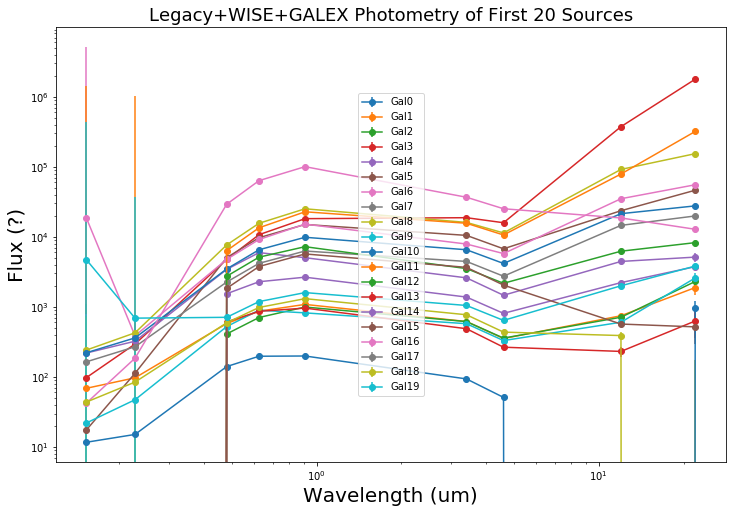

In [79]:
plt.figure(figsize=(12,8))
wavelengths = np.array([.480,.625,.910,3.4,4.6,12,22,.2271,.1528],'f')
sorted_indices = np.argsort(wavelengths)
# galex effective wavelengths from http://www.galex.caltech.edu/researcher/techdoc-ch1.html
for i in range(len(ptab)):
    flux,flux_err = getSED(ptab,i)
    

    #print(i,len(wavelengths),len(flux),len(flux_err))
    #print(flux_err)
    #try:
    #    plt.errorbar(wavelengths,flux,yerr=flux_err)
    #except:
    #plt.scatter(wavelengths,flux,s=10)
    plt.errorbar(wavelengths[sorted_indices],flux[sorted_indices],yerr=flux_err[sorted_indices],fmt='o-',label='Gal'+str(i))
    #plt.scatter(wavelengths,flux)
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.xlabel('Wavelength (um)',fontsize=20)
plt.ylabel('Flux (?)',fontsize=20)
plt.legend(loc='center')
plt.title('Legacy+WISE+GALEX Photometry of First 20 Sources',fontsize=18)

In [45]:
os.chdir(homedir+'/research/Virgo/legacy-phot')

In [ ]:
# want to display legacy images with sed, and apphot


/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Data has no positive values, and therefore cannot be log-scaled.


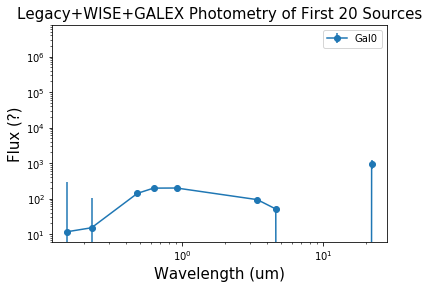

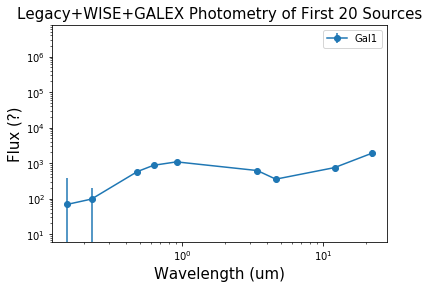

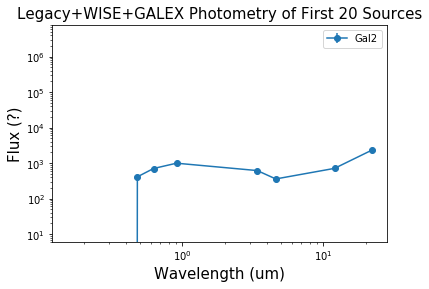

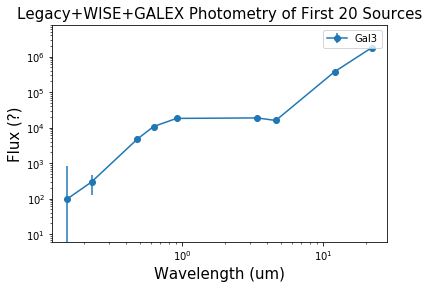

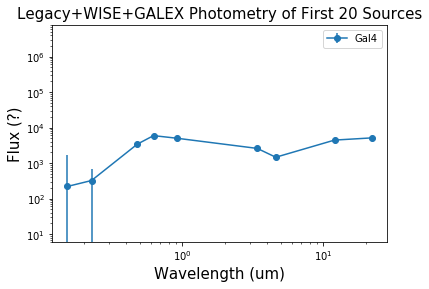

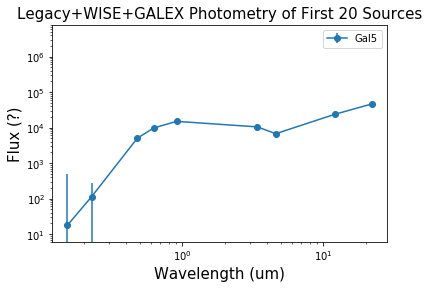

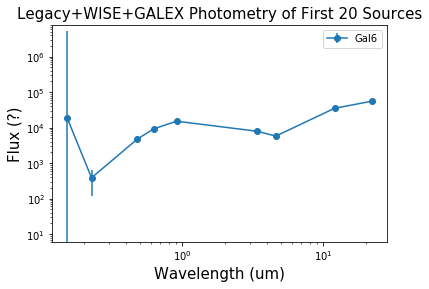

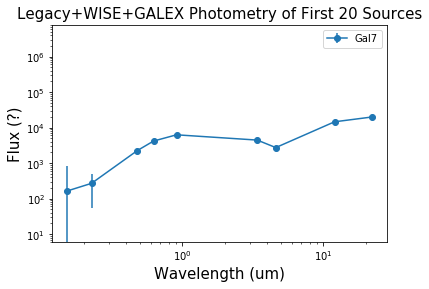

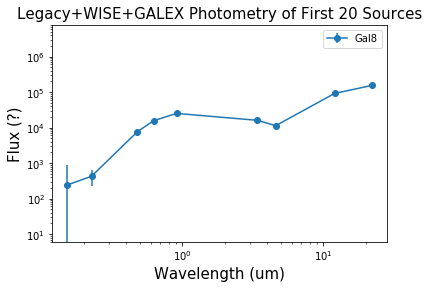

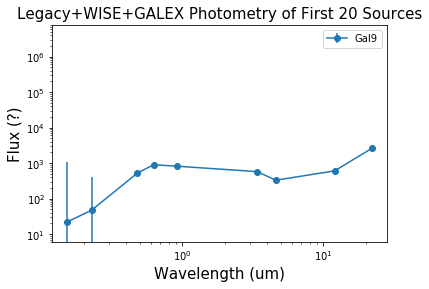

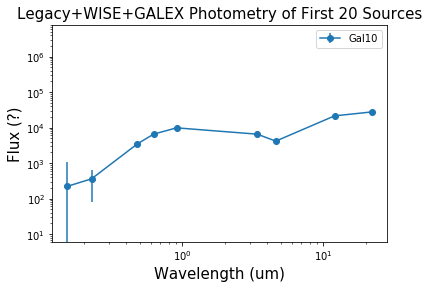

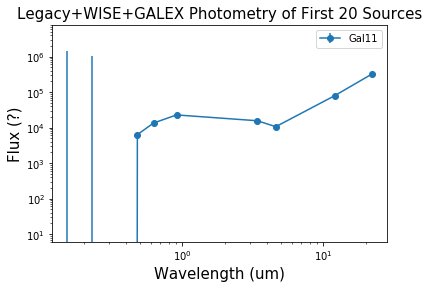

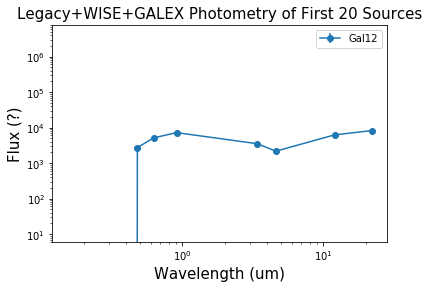

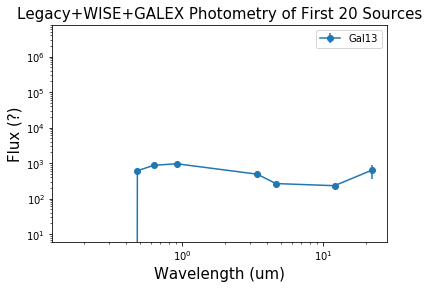

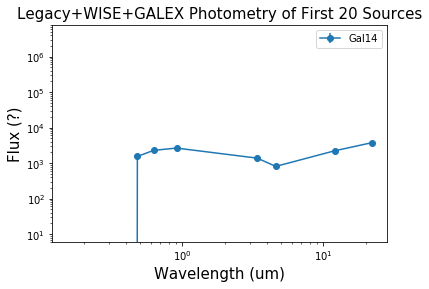

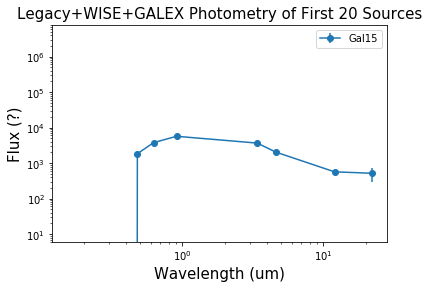

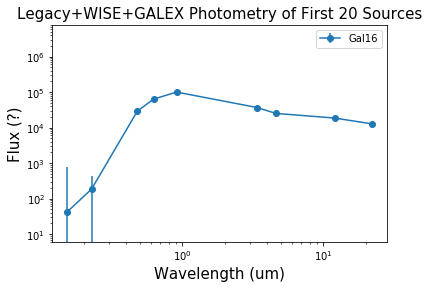

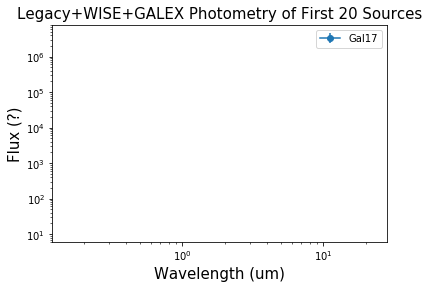

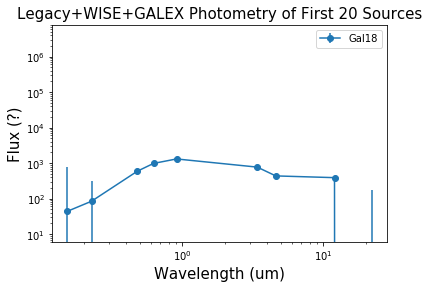

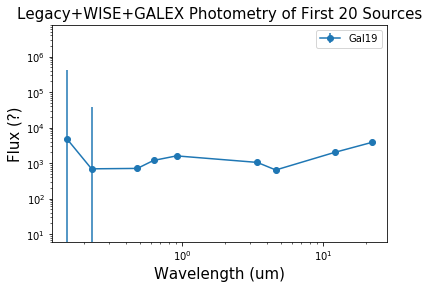

In [49]:
# plot SEDs individually

wavelengths = np.array([.480,.625,.910,3.4,4.6,12,22,.2271,.1528],'f')
sorted_indices = np.argsort(wavelengths)
# galex effective wavelengths from http://www.galex.caltech.edu/researcher/techdoc-ch1.html
for i in range(len(ptab)):
    plt.figure(figsize=(6,4))
    flux,flux_err = getSED(ptab,i)
    

    #print(i,len(wavelengths),len(flux),len(flux_err))
    #print(flux_err)
    #try:
    #    plt.errorbar(wavelengths,flux,yerr=flux_err)
    #except:
    #plt.scatter(wavelengths,flux,s=10)
    plt.errorbar(wavelengths[sorted_indices],flux[sorted_indices],yerr=flux_err[sorted_indices],fmt='o-',label='Gal'+str(i))
    #plt.scatter(wavelengths,flux)
    plt.gca().set_yscale('log')
    plt.gca().set_xscale('log')
    plt.xlabel('Wavelength (um)',fontsize=15)
    plt.ylabel('Flux (?)',fontsize=15)
    plt.legend()
    plt.title('Legacy+WISE+GALEX Photometry of First 20 Sources',fontsize=15)
    plt.ylim(6,8e6)

# Flux Profiles

In [82]:
def plotapflux(table,index):
    bands = ['G','R','Z','W1','W2','W3','W4','NUV']#,'FUV']
    flux = []
    flux_err = []
    for b in bands:
        flux_key = 'APFLUX_'+b
        ivar_key = 'FLUX_IVAR_'+b
        flux = table[flux_key][index]
        flux_err = 1./np.sqrt(table[ivar_key][index])
        aps = np.arange(len(flux))
        aps += 1
        fwhm_key = 'PSFSIZE_'+b
        #aps = aps*table[fwhm_key][i]
        plt.errorbar(aps,flux,yerr=flux_err,label=b,fmt='o-')
        plt.xlabel('Apertures (?)',fontsize=15)
        plt.ylabel('Flux (?)',fontsize=15)
        

/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
/home/rfinn/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  """


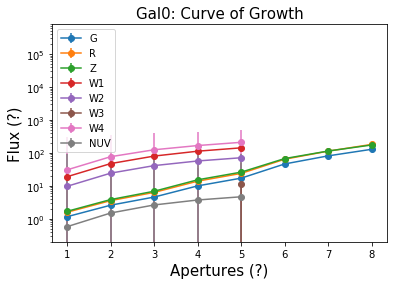

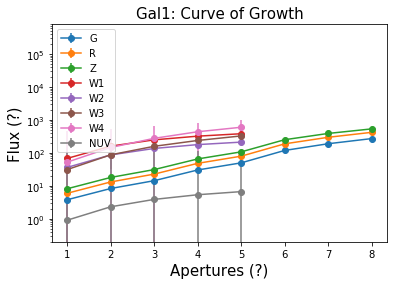

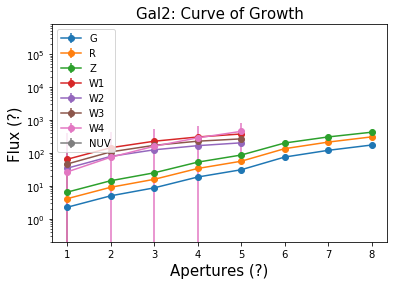

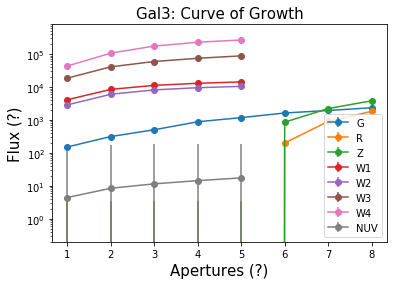

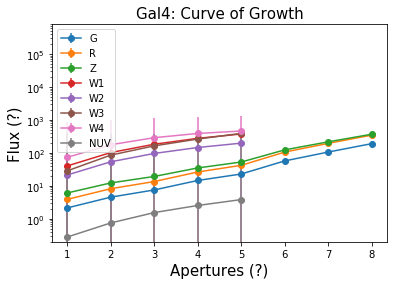

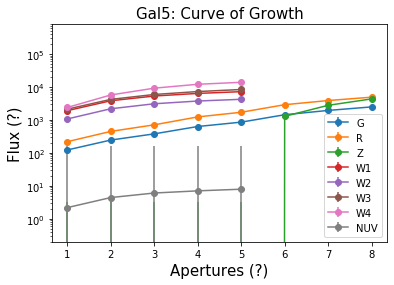

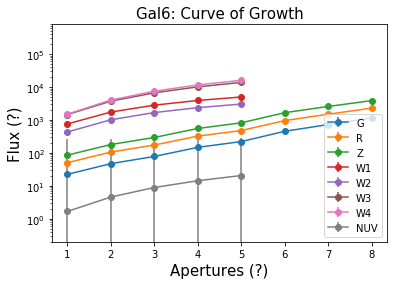

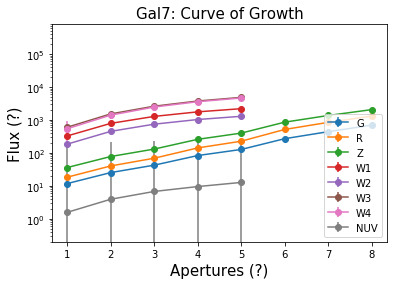

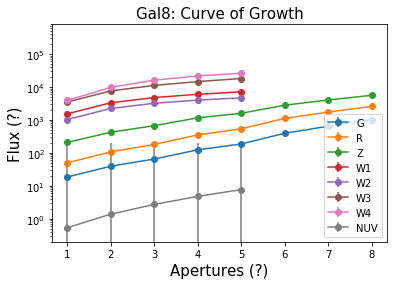

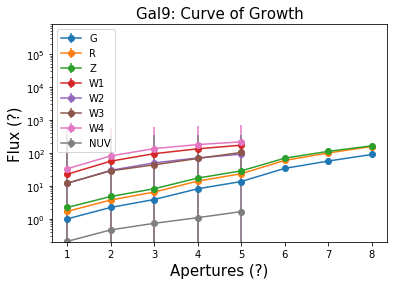

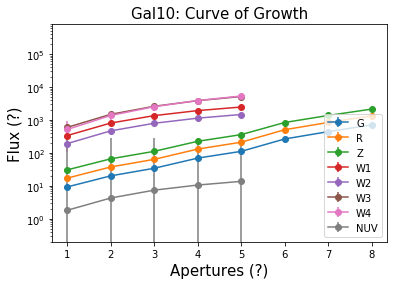

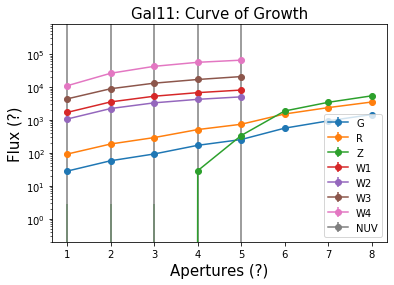

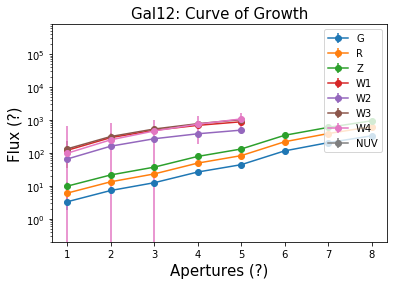

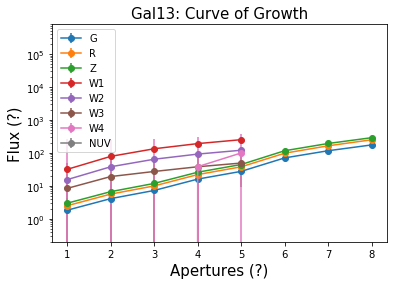

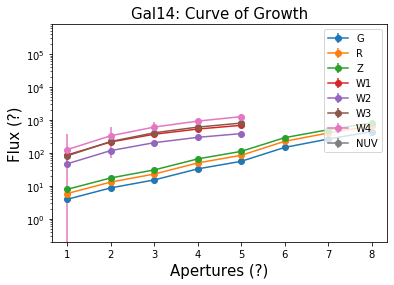

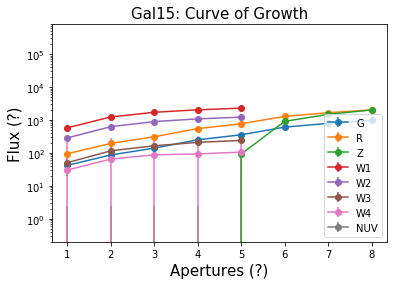

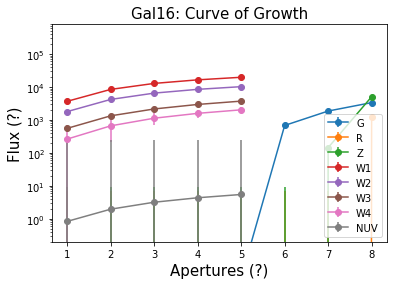

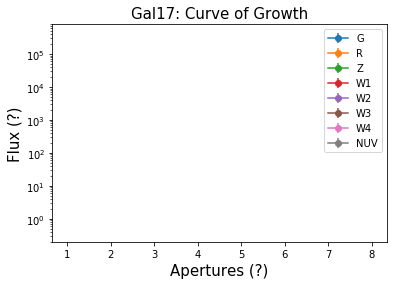

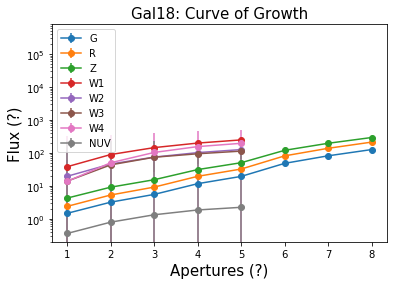

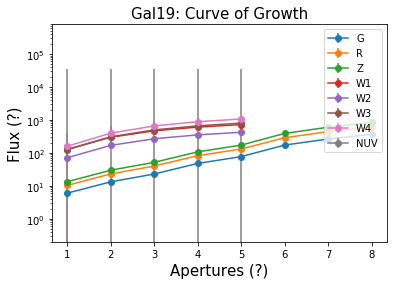

In [83]:
# plot curve of growth for all 20 galaxies
for index in range(20):
    plt.figure(figsize=(6,4))
    plotapflux(ptab,index)
    plt.gca().set_yscale('log')
    plt.ylim(.2,8.e5)
    plt.legend()
    plt.title('Gal'+str(index)+': Curve of Growth',fontsize=15)